<a href="https://www.kaggle.com/code/yaramahrous/predictive-maintenance?scriptVersionId=199754262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform



In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm_plot_labels=['no_failure','failure']

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
    print(cm)

    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [2]:
df=pd.read_csv('predictive_maintenance.csv')
df.head() 

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [5]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [6]:
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [10]:
df = pd.get_dummies(df)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,False,True,False


In [11]:
y = df['Target']
x = df.drop('Target',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])

In [52]:
model.fit(x=x_train, y=y_train, batch_size=20, epochs=30, shuffle=True, verbose=2,validation_split=0.1)


Epoch 1/30

695/695 - 2s - 2ms/step - binary_accuracy: 0.9092 - loss: 0.2324 - val_binary_accuracy: 0.9346 - val_loss: 0.1567

Epoch 2/30

695/695 - 1s - 991us/step - binary_accuracy: 0.9400 - loss: 0.1462 - val_binary_accuracy: 0.9172 - val_loss: 0.2130

Epoch 3/30

695/695 - 1s - 906us/step - binary_accuracy: 0.9463 - loss: 0.1329 - val_binary_accuracy: 0.9573 - val_loss: 0.1051

Epoch 4/30

695/695 - 1s - 856us/step - binary_accuracy: 0.9509 - loss: 0.1225 - val_binary_accuracy: 0.9612 - val_loss: 0.0916

Epoch 5/30

695/695 - 1s - 830us/step - binary_accuracy: 0.9520 - loss: 0.1135 - val_binary_accuracy: 0.9599 - val_loss: 0.0980

Epoch 6/30

695/695 - 1s - 895us/step - binary_accuracy: 0.9550 - loss: 0.1066 - val_binary_accuracy: 0.9676 - val_loss: 0.0945

Epoch 7/30

695/695 - 1s - 866us/step - binary_accuracy: 0.9594 - loss: 0.1010 - val_binary_accuracy: 0.9702 - val_loss: 0.0864

Epoch 8/30

695/695 - 1s - 873us/step - binary_accuracy: 0.9604 - loss: 0.0984 - val_binary_accurac

In [53]:
model.fit(x=x_train, y=y_train, batch_size=20, epochs=30, shuffle=True, verbose=2,validation_split=0.1)


Epoch 1/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9758 - loss: 0.0614 - val_binary_accuracy: 0.9812 - val_loss: 0.0554

Epoch 2/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9765 - loss: 0.0598 - val_binary_accuracy: 0.9883 - val_loss: 0.0328

Epoch 3/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9750 - loss: 0.0597 - val_binary_accuracy: 0.9806 - val_loss: 0.0442

Epoch 4/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9768 - loss: 0.0600 - val_binary_accuracy: 0.9592 - val_loss: 0.1021

Epoch 5/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9767 - loss: 0.0582 - val_binary_accuracy: 0.9825 - val_loss: 0.0459

Epoch 6/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9771 - loss: 0.0577 - val_binary_accuracy: 0.9845 - val_loss: 0.0463

Epoch 7/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9779 - loss: 0.0567 - val_binary_accuracy: 0.9631 - val_loss: 0.0779

Epoch 8/30

695/695 - 1s - 1ms/step - binary_accuracy: 0.9779 - loss: 0.0565 - val_binary_accuracy: 0.9773 - va

In [54]:
preds = model.predict(x_test)
pred_labels = (preds > 0.5).astype(int)

print(classification_report(y_test, pred_labels))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

              precision    recall  f1-score   support



           0       0.99      0.97      0.98      1939

           1       0.46      0.70      0.55        61



    accuracy                           0.97      2000

   macro avg       0.72      0.84      0.77      2000

weighted avg       0.97      0.97      0.97      2000




Confusion Matrix without normalization

[[1888   51]

 [  18   43]]


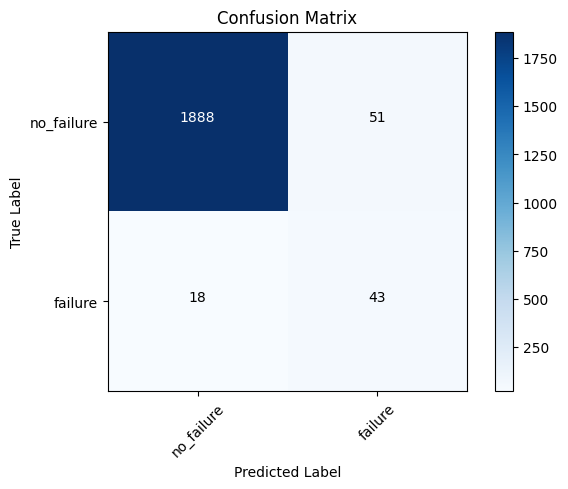

In [55]:
cm = confusion_matrix(y_test, pred_labels)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [410]:
final_model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

final_model.summary()

Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_371 (Dense)               │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_372 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_373 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_374 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_375 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [411]:
final_model.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.BinaryFocalCrossentropy(
    alpha=0.05,gamma=3.0,from_logits=True,reduction="sum_over_batch_size"))

In [412]:
final_model.fit(x=x_train, y=y_train, batch_size=10, epochs=30, shuffle=True, verbose=2,validation_split=0.1)

Epoch 1/30

1390/1390 - 3s - 2ms/step - loss: 0.0611 - val_loss: 0.0159

Epoch 2/30

1390/1390 - 2s - 1ms/step - loss: 0.0566 - val_loss: 0.0187

Epoch 3/30

1390/1390 - 2s - 1ms/step - loss: 0.0562 - val_loss: 0.0194

Epoch 4/30

1390/1390 - 1s - 1ms/step - loss: 0.0557 - val_loss: 0.0166

Epoch 5/30

1390/1390 - 2s - 1ms/step - loss: 0.0552 - val_loss: 0.0177

Epoch 6/30

1390/1390 - 2s - 1ms/step - loss: 0.0546 - val_loss: 0.0198

Epoch 7/30

1390/1390 - 1s - 1ms/step - loss: 0.0551 - val_loss: 0.0163

Epoch 8/30

1390/1390 - 2s - 1ms/step - loss: 0.0539 - val_loss: 0.0110

Epoch 9/30

1390/1390 - 1s - 1ms/step - loss: 0.0533 - val_loss: 0.0122

Epoch 10/30

1390/1390 - 1s - 1ms/step - loss: 0.0535 - val_loss: 0.0147

Epoch 11/30

1390/1390 - 2s - 1ms/step - loss: 0.0532 - val_loss: 0.0133

Epoch 12/30

1390/1390 - 1s - 1ms/step - loss: 0.0540 - val_loss: 0.0174

Epoch 13/30

1390/1390 - 1s - 1ms/step - loss: 0.0540 - val_loss: 0.0154

Epoch 14/30

1390/1390 - 1s - 1ms/step - loss: 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

              precision    recall  f1-score   support



           0       0.99      0.99      0.99      1939

           1       0.78      0.64      0.70        61



    accuracy                           0.98      2000

   macro avg       0.88      0.82      0.85      2000

weighted avg       0.98      0.98      0.98      2000



Confusion Matrix without normalization

[[1928   11]

 [  22   39]]


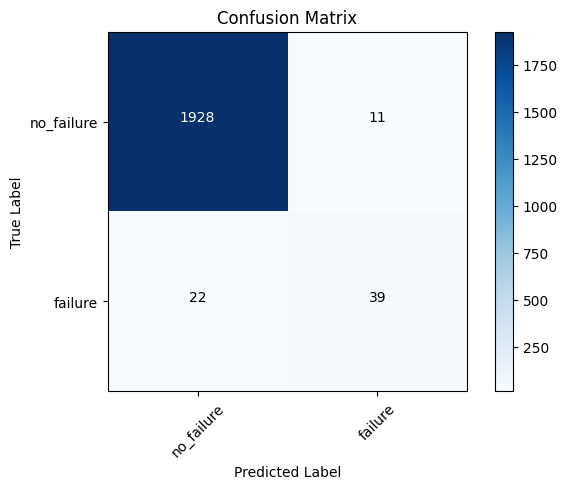

In [400]:
preds = final_model.predict(x_test)
pred_labels = (preds > 0.5).astype(int)

print(classification_report(y_test, pred_labels))
cm=confusion_matrix(y_true=y_test, y_pred=pred_labels)
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')